In [47]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
sns.set()

In [ ]:
customer = pd.read_csv("./customers.csv")

EDA

In [49]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

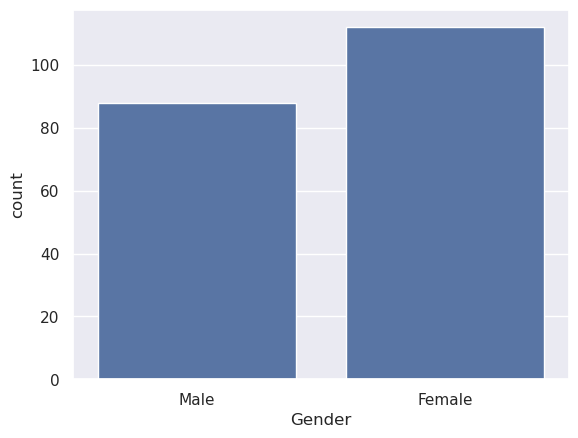

Gender
Female    112
Male       88
Name: count, dtype: int64


In [66]:
sns.countplot(x='Gender', data=customer)
plt.show()

print(customer['Gender'].value_counts())

In [54]:
customer['Annual Income'] = customer['Annual Income (k$)']
customer['Spending Score'] = customer['Spending Score (1-100)']

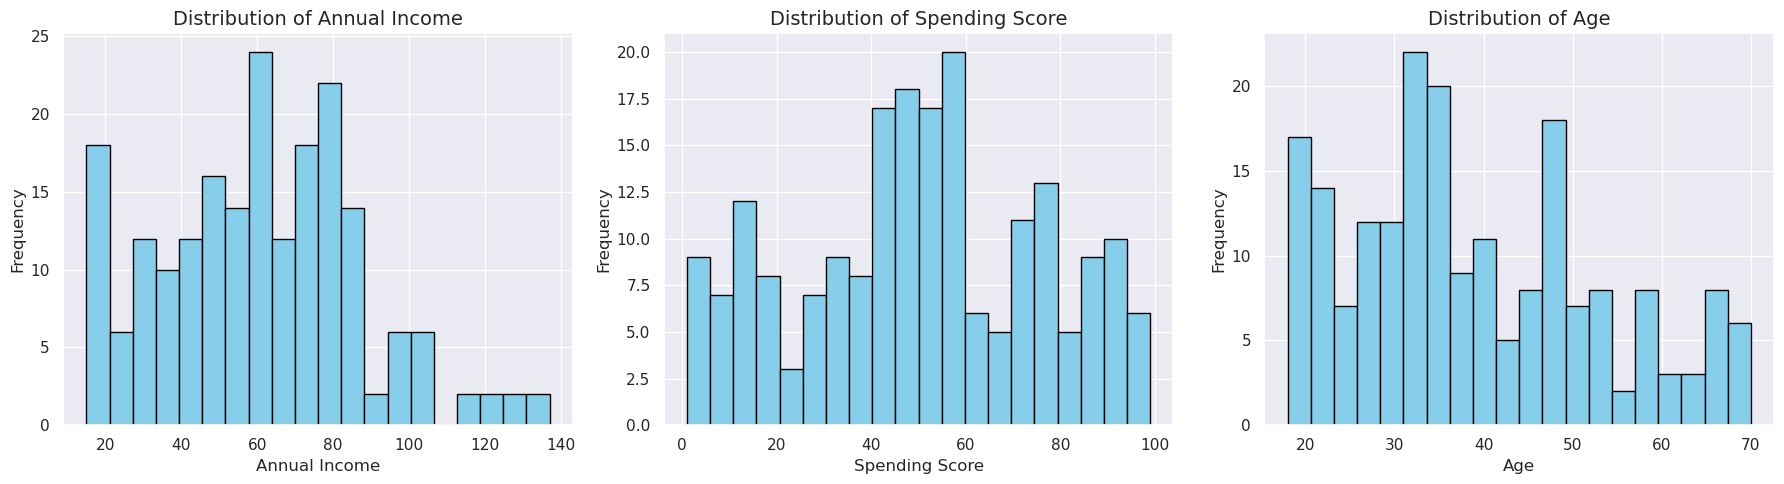

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

columns_to_plot = ['Annual Income', 'Spending Score', 'Age']
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(customer[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

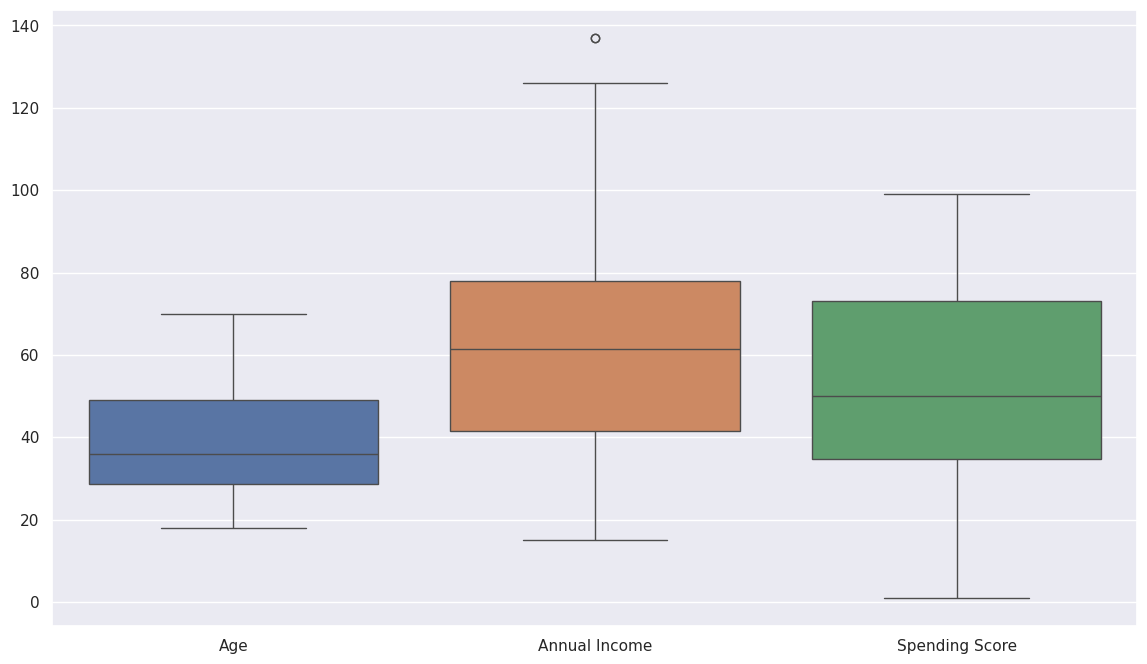

In [58]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=customer[['Age', 'Annual Income', 'Spending Score']])
plt.show()

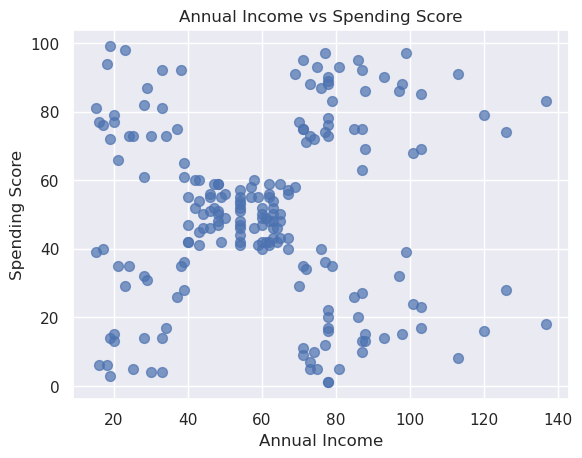

In [71]:
plt.scatter(customer['Annual Income'], customer['Spending Score'], s=50, alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

Preprocessing

In [87]:
customer = customer.copy()
encoder = LabelEncoder()
customer['Gender'] = encoder.fit_transform(customer['Gender'])
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income,Spending Score
0,1,1,19,15,39,15,39
1,2,1,21,15,81,15,81
2,3,0,20,16,6,16,6
3,4,0,23,16,77,16,77
4,5,0,31,17,40,17,40


Modeling with k-means

Text(0, 0.5, 'Inertia')

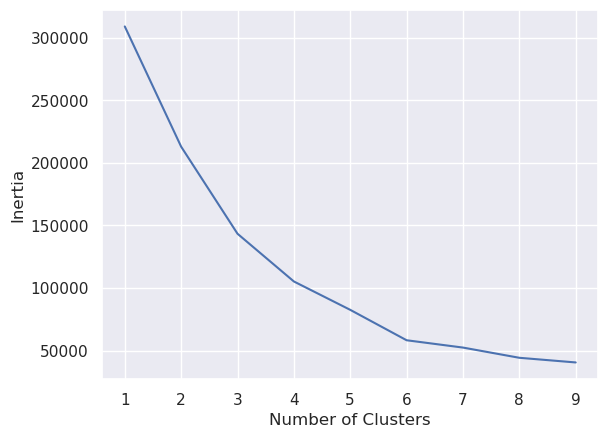

In [88]:
# Find n_clusters number with elbow method

points = customer.iloc[:, 1:5].values
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [90]:
points = customer.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]

In [91]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

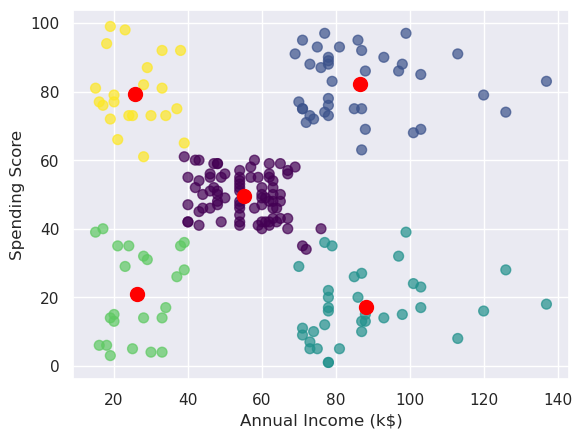

In [92]:
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [95]:
customer = customer.copy()
customer['Cluster'] = kmeans.predict(points)
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income,Spending Score,Cluster
0,1,1,19,15,39,15,39,3
1,2,1,21,15,81,15,81,4
2,3,0,20,16,6,16,6,3
3,4,0,23,16,77,16,77,4
4,5,0,31,17,40,17,40,3


In [94]:
# Who have high incomes but low spending scores
cluster = kmeans.predict(np.array([[120, 20]]))[0]
clustered_customer = customer[customer['Cluster'] == cluster]
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

In [100]:
results = pd.DataFrame(columns=['Cluster', 'Average Annual Income', 'Average Spending Score', 'Number of Females', 'Number of Males'])

# Iterate through each cluster center
for i, center in enumerate(kmeans.cluster_centers_):
    annual_income = center[0]  
    spending_score = center[1]  

    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]

    results.loc[i] = ([i, annual_income, spending_score, females, males])
    
# Display results
results

,Cluster,Average Annual Income,Average Spending Score,Number of Females,Number of Males
0,0.0,55.296296,49.518519,48.0,33.0
1,1.0,86.538462,82.128205,21.0,18.0
2,2.0,88.200000,17.114286,16.0,19.0
3,3.0,26.304348,20.913043,14.0,9.0
4,4.0,25.727273,79.363636,13.0,9.0
